In [40]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv('tsa_travelers_20200930.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Travelers'] = df['Travelers'].str.replace(",", "").astype(int)
df['YoY'] = df['YoY'].str.replace(",", "").astype(int)
df.sort_values(by='Date', inplace=True)
df.set_index('Date', inplace=True)


# Calcs
df['absolute_YoY'] = df['YoY'] - df['Travelers']
df['perc_YoY'] = df['Travelers'] / df['YoY']

In [62]:
df.head()

,Travelers,YoY,absolute_YoY,perc_YoY
Date,,,,
2020-04-30,154695,2499461,2344766,0.061891
2020-05-01,171563,2546029,2374466,0.067385
2020-05-02,134261,1968278,1834017,0.068212
2020-05-03,170254,2512598,2342344,0.067760
2020-05-04,163692,2470969,2307277,0.066246


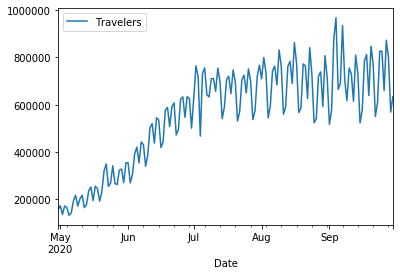

In [64]:
# Plot absolute numbers
df.plot(y='Travelers');

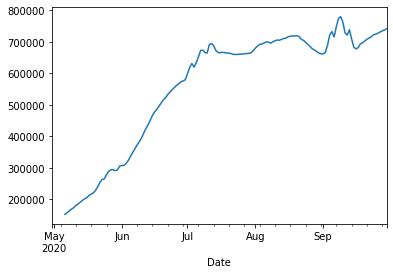

In [65]:
# Plot rolling average
df.rolling(7)['Travelers'].mean().plot();

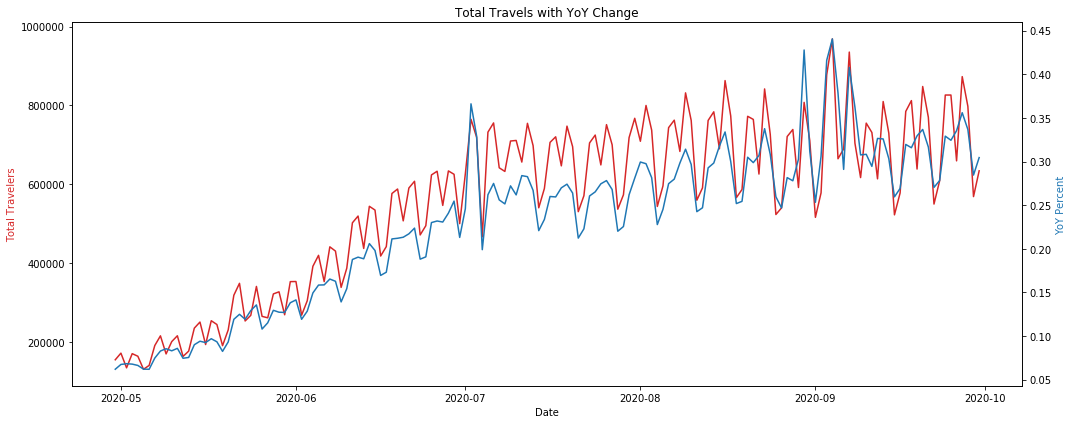

In [66]:
# Plot two lines on the same chart
fig, ax1 = plt.subplots(figsize=(15,6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Travelers', color=color)
ax1.plot(df['Travelers'], color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('YoY Percent', color=color)  # we already handled the x-label with ax1
ax2.plot(df['perc_YoY'], color=color)

plt.title("Total Travels with YoY Change")
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()